# Задача 3

## Численное диффиренцирование

### 1. Определение классов

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import math

smp.init_printing(use_latex=True)
xSym = smp.Symbol('x')

plt.rc('font', size=12)
figureSizeConst = (13, 6.7)

In [2]:
# test data
test_f = lambda x: 2 * x
a = 0.
x = 2.
N = 100

In [3]:
# main class
class AntiderivativeMain:
    
    # constructor
    def __init__(self, f, a, N):
        self.f = f
        self.a = a
        self.N = N
        
        self.alphas = []
        self.grid_points = []
        self.h = None
        
    # setter for alphas
    def SetAlphas(self):
        raise NotImplementedError
        
    # method for calculating grid points
    def SetGrid(self, x):
        raise NotImplementedError
        
    
    # call method
    def __call__(self, x):
        self.SetAlphas()
        self.SetGrid(x)
        
        res = 0.
        for i in xrange(len(self.grid_points)):
            t = self.grid_points[i]
            res += self.h * self.alphas[i] * self.f(t)
            
        return res

In [4]:
# sec formula's method
class AntiderivativeSec(AntiderivativeMain):
    # redefenition for alpha's setter
    def SetAlphas(self):
        self.alphas = np.ones(self.N + 1, dtype = float)
        
    # redefenition for grid's setter
    def SetGrid(self, x):
        a = self.a
        N = self.N
        
        x = float(x)
        self.h = (x - a) / N
        
        self.grid_points = np.linspace(a + self.h, x, N + 1)

In [5]:
#testing for sec formula
func1 = AntiderivativeSec(test_f, a, N)
func1.SetAlphas()

print(func1(x))

4.0804


In [6]:
# third formula's method
class AntiderivativeThird(AntiderivativeMain):
    # redefenition for alpha's setter
    def SetAlphas(self):
        self.alphas = np.ones(self.N + 1, dtype = float)
        
    # redefenition for grid's setter
    def SetGrid(self, x):
        a = self.a
        N = self.N
        
        x = float(x)
        self.h = (x - a) / N
        
        self.grid_points = np.linspace(a, x - self.h, N)

In [7]:
#testing for third formula
func2 = AntiderivativeThird(test_f, a, N)
func2.SetAlphas()

print(func2(x))

3.959999999999999


In [8]:
# fourth formula's method
class AntiderivativeFourth(AntiderivativeMain):
    # redefenition for alpha's setter
    def SetAlphas(self):
        self.alphas = np.ones(self.N + 1, dtype = float)
        
    # redefenition for grid's setter
    def SetGrid(self, x):
        a = self.a
        N = self.N
        
        x = float(x)
        self.h = (x - a) / N
        
        self.grid_points = np.linspace(a + self.h / 2, x, N)

In [9]:
#testing for fourth formula
func3 = AntiderivativeFourth(test_f, a, N)
func3.SetAlphas()

print(func3(x))

4.02


In [10]:
# fifth formula's method
class AntiderivativeFifth(AntiderivativeMain):
    #redefenition for alpha's setter
    def SetAlphas(self):
        self.alphas = np.ones(self.N + 1, dtype = float)
        
        self.alphas[0] = 1. / 2
        self.alphas[self.N] = 1. / 2
        
    # redefenition for grid's setter
    def SetGrid(self, x):
        a = self.a
        N = self.N
        
        x = float(x)
        self.h = (x - a) / N
        
        self.grid_points = np.linspace(a, x, N)

In [11]:
#testing for fifth formula
func4 = AntiderivativeFifth(test_f, a, N)
func4.SetAlphas()

print(func4(x))

4.0


In [12]:
# Simpson formula's method
class AntiderivativeSimpson(AntiderivativeMain):
    # redefenition for alpha's setter
    def SetAlphas(self):
        self.alphas = 1. / 3 * np.ones(self.N + 1, dtype=float)
        for i in xrange(self.N):
            if i != 0 & i != self.N:
                if i % 2 == 0:
                    self.alphas[i] *= 4
                else:
                    self.alphas[i] *= 2
        
    # redefenition for grid's setter
    def SetGrid(self, x):
        a = self.a
        N = self.N
        
        x = float(x)
        self.h = (x - a) / N
        
        self.grid_points = np.linspace(a, x, N + 1)

In [13]:
#testing for Simpson's formula
func5 = AntiderivativeSimpson(test_f, a, N)
func5.SetAlphas()

print(func5(x))

3.973333333333334


### 2. Использование классов

In [14]:
# function defenitions
functionsSym = [smp.sin(xSym ** 2.), \
                smp.cos(smp.sin(xSym)), \
                smp.exp(smp.cos(smp.sin(xSym))), \
                smp.log(xSym + 3.), \
                (xSym + 3.) ** (1. / 2) ]

functions = [smp.lambdify(xSym, f) for f in functionsSym]
integralsAnalyticalSym = [smp.integrate(fSym, (xSym, a, x)) for fSym in functionsSym]
integralsAnalytical = [float(i) for i in integralsAnalyticalSym]

In [15]:
# defenition of the corresponding antiderivatives 
integralsNumerical = [
    AntiderivativeSec,
    AntiderivativeThird,
    AntiderivativeFourth,
    AntiderivativeFifth,
    AntiderivativeSimpson,
]

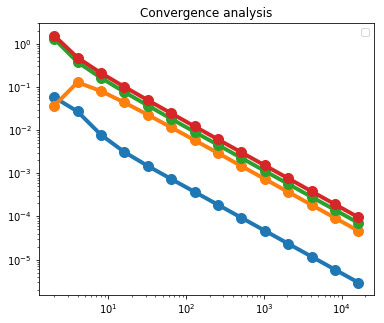

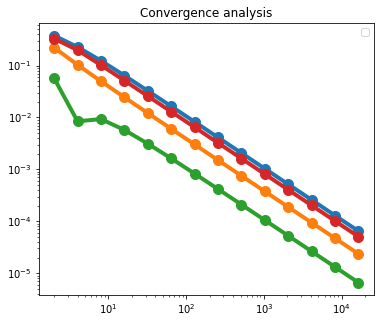

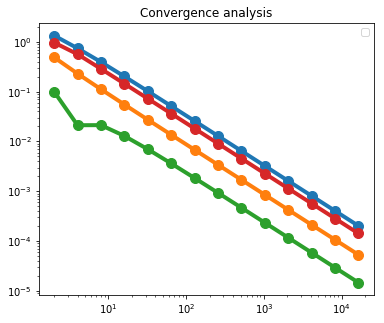

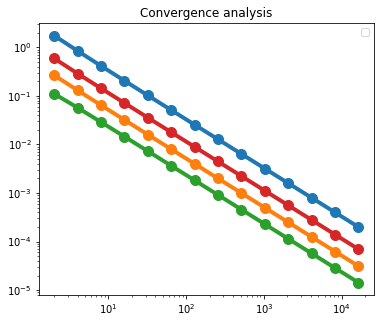

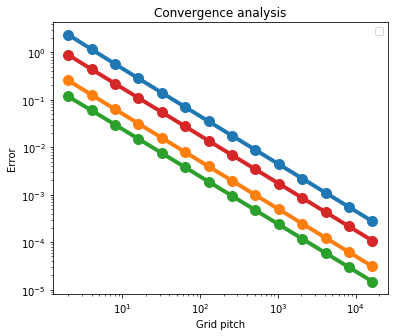

In [17]:
steps = [2**n for n in range(1, 15)]

for f, integralAnalytical in zip(functions, integralsAnalytical):
        
        plt.figure(figsize = (6, 5))
        plt.title('Convergence analysis')
        
        for i in range(4):
            errors = []
            for h in steps:
                integralNum = integralsNumerical[i](f, a, h)
                integralNum.SetAlphas()
                
                error = math.fabs(integralNum(x) - integralAnalytical)
                errors.append(error)
                
            plt.loglog(steps, errors, '-o', linewidth=4, markersize=10)
            plt.legend(loc='best')
            
plt.xlabel('Grid pitch')
plt.ylabel('Error')
plt.show()